<img src = 'dt.png' />

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

import warnings 
warnings.simplefilter('ignore')

<h2>Step 2 -----	Data loading </h2>

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<h2> Step 3 ---- Data Preprocessing/ Understanding </h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [6]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
#sns.heatmap(df.corr(),annot = True)
#plt.show()

In [10]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

<h2> Step 4 ---- Data Cleaning </h2>

In [11]:
df['sex'].replace('.','MALE',inplace = True)

In [12]:
df['sex'].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

In [13]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace = True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace = True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace = True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace = True)
df['sex'].fillna(df['sex'].mode()[0],inplace = True)

In [14]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<h2> Step 5 ----- Data wrangling </h2> 

In [15]:
X = df.drop('species', axis =1)
y = df['species']
X = pd.get_dummies(X,drop_first = True)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,True,False


In [88]:
#X = pd.get_dummies(df.drop('species', axis =1), drop_first = True)
#y = df['species']

#X # after encoding out of 3 island categoris 1 is dropped same for sex column as well -  One hot encoding 

<h2> Step 6 ---- Best Random State </h2> 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define your dataset (X and y)

# Define the model


# Define a range of random_state values to try
random_state_values = range(1, 101)

best_random_state = None
best_accuracy = 0
acc = []

# Loop over different random_state values
for random_state in random_state_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    scores = cross_val_score(model, X, y, cv=5)  
    mean_accuracy = np.mean(scores)
    
    
    acc.append({'random_state': random_state, 
                'accuracy_train': accuracy_train,
                'accuracy_test':accuracy_test,
                'cross_val_score': mean_accuracy
               })
    
acc

em= pd.DataFrame(acc)
gm = em[(abs(em['accuracy_train'] - em['accuracy_test'])<= 0.05) & (em['accuracy_test']- em['cross_val_score']) <=0.05]
print(gm[gm['accuracy_test'] == gm['accuracy_test'].max()].index.to_list()[0])

19


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define your dataset (X and y)

# Define the model
model = DecisionTreeClassifier()

# Define a range of random_state values to try
random_state_values = range(1, 10)  # Try a range of random_state values

best_random_state = None
best_mean_accuracy = 0
acc = []

# Loop over different random_state values
for random_state in random_state_values:
    # Split the data using the current random_state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Use cross-validation to evaluate the model's performance
    scores = cross_val_score(model, X_train, y_train, cv=5)  # You can adjust the number of cross-validation folds (cv) as needed
    
    # Calculate the mean accuracy across cross-validation folds
    mean_accuracy = np.mean(scores)
    
    acc.append({'random_state': random_state, 'mean_accuracy': mean_accuracy})
    
acc

[{'random_state': 1, 'mean_accuracy': 0.9745454545454546},
 {'random_state': 2, 'mean_accuracy': 0.9781818181818182},
 {'random_state': 3, 'mean_accuracy': 0.96},
 {'random_state': 4, 'mean_accuracy': 0.9781818181818182},
 {'random_state': 5, 'mean_accuracy': 0.9745454545454546},
 {'random_state': 6, 'mean_accuracy': 0.9636363636363636},
 {'random_state': 7, 'mean_accuracy': 0.9781818181818182},
 {'random_state': 8, 'mean_accuracy': 0.9672727272727272},
 {'random_state': 9, 'mean_accuracy': 0.9672727272727272}]

<h2> Step 7 ---- Splitting with best Random state </h2>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

<h2> Step 8----Default Modelling </h2>

In [18]:
dt_default = DecisionTreeClassifier(random_state=0)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

<h2> Step 9	---- Model Evaluation </h2> 

In [19]:
#Predicting

pred_train = dt_default.predict(X_train)
pred_test = dt_default.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(dt_default,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
[0.98550725 0.98550725 0.98550725 0.97101449 0.94117647]
Cross Validation : 0.9737425404944586


In [20]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [21]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<h2> With 97% accuracy we can predict the Outcome for the given i/p features with Decision Tree</h2>

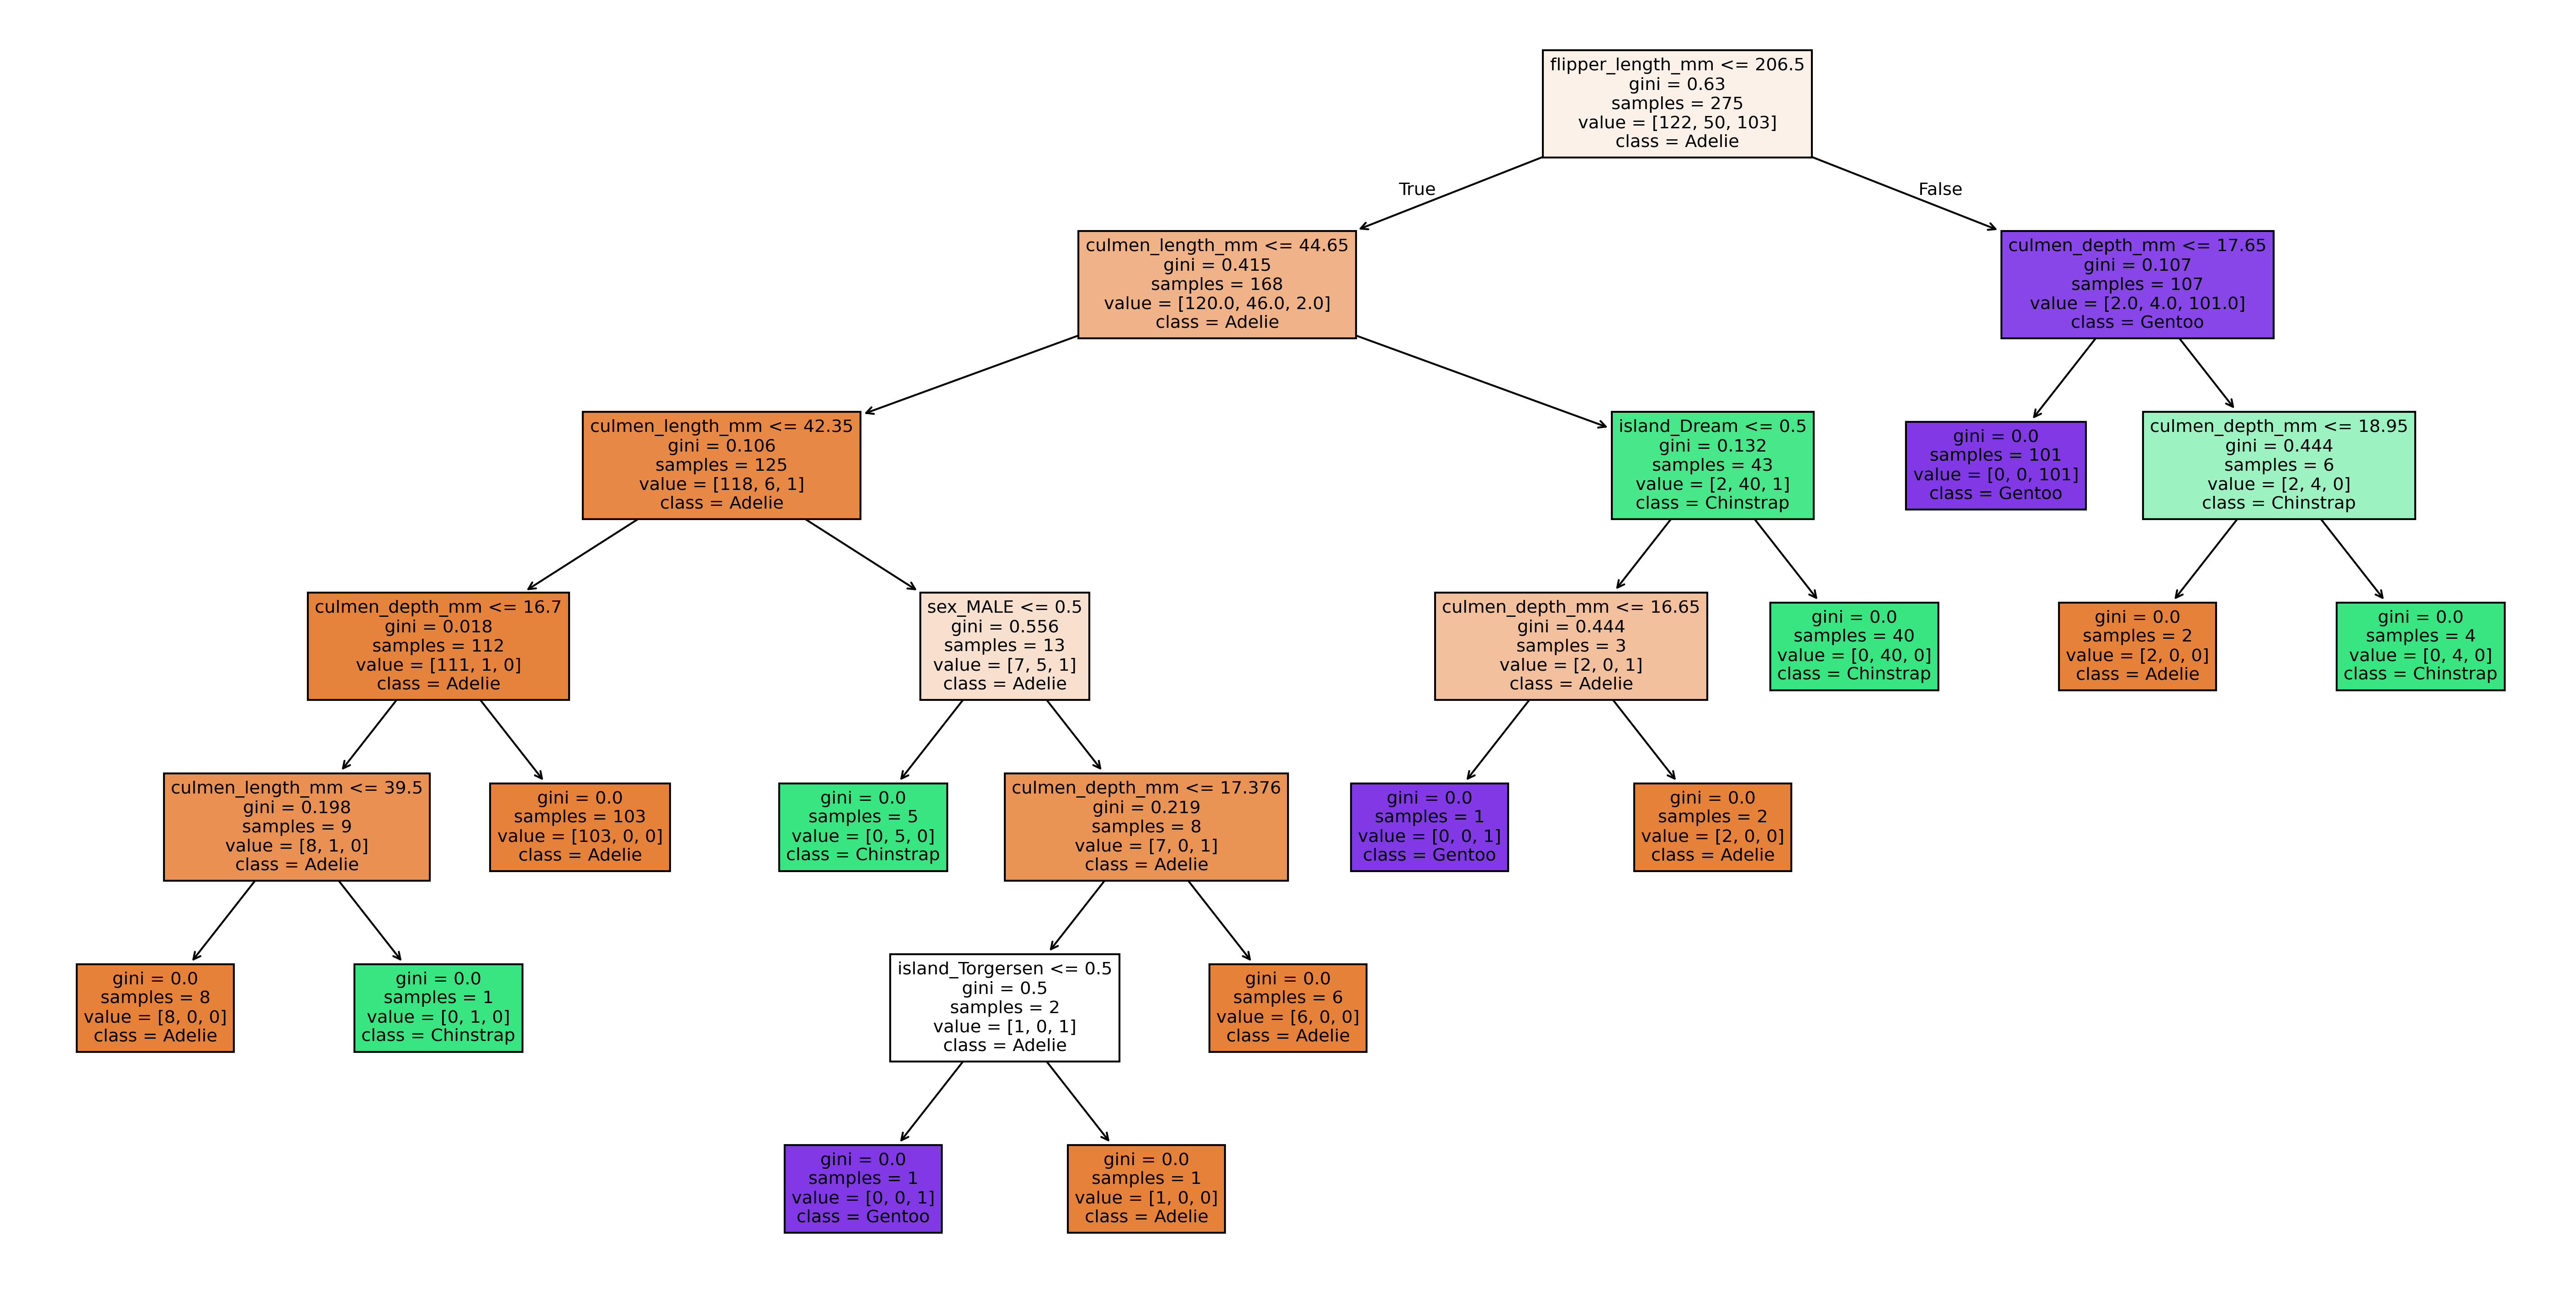

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi = 300)
plot_tree(dt_default,
          filled = True, 
          feature_names=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_Dream','island_Torgersen','sex_MALE'],
         class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

<h2> Step 10---- HyperParams Tunning </h2>

In [23]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=0)
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5]}
              #'min_samples_leaf': [1,2,3,4,5],
              #'min_samples_split': [2],
              #'max_leaf_nodes':[2]}
grid = GridSearchCV(estimator,param_grid,cv=5,scoring= 'accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [24]:
grid.best_estimator_.feature_importances_

array([0.34390987, 0.05670105, 0.5346114 , 0.00774261, 0.02520849,
       0.        , 0.03182658])

In [25]:
X_train.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

<h2> Step 11 ----- Final Modelling with Best Hyper Params </h2>

In [27]:
#Drop the column with 0 importance
#X_train = X_train.drop('island_Torgersen', axis=1)

feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Feature Importance'])
feats_imp = feats[feats['Feature Importance'] > 0]
imp_featues_list = feats_imp.index.to_list()
imp_featues_list

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'sex_MALE']

In [28]:
X_imp = X[imp_featues_list]
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)
dt_final = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=0)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

<h2> Step12 --- Model Evaluation </h2>

In [29]:
#Predicting

pred_train = dt_final.predict(X_train)
pred_test = dt_final.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(dt_final,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 0.9963636363636363
Test Accuracy: 1.0
[0.98550725 0.98550725 0.98550725 0.97101449 0.94117647]
Cross Validation : 0.9737425404944586
